<a href="https://colab.research.google.com/github/IvanDiazBravo/Trabajo_Final_Curso_IA_MSF_MECO/blob/main/Proyecto_Fin_Curso_IvanDiazBravo_RegresionLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Modelo: Random Forest

              precision    recall  f1-score   support

           0       0.25      0.50      0.33        10
           1       0.42      0.33      0.37        15
           2       0.43      0.27      0.33        11
           3       0.57      0.40      0.47        10

    accuracy                           0.37        46
   macro avg       0.42      0.38      0.38        46
weighted avg       0.42      0.37      0.38        46


Modelo: Decision Tree

              precision    recall  f1-score   support

           0       0.29      0.50      0.37        10
           1       0.18      0.13      0.15        15
           2       0.15      0.18      0.17        11
           3       0.40      0.20      0.27        10

    accuracy                           0.24        46
   macro avg       0.26      0.25      0.24        46
weighted avg       0.25      0.24      0.23        46



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:45:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Modelo: Logistic Regression

              precision    recall  f1-score   support

           0       0.13      0.30      0.18        10
           1       0.25      0.13      0.17        15
           2       0.25      0.27      0.26        11
           3       0.67      0.20      0.31        10

    accuracy                           0.22        46
   macro avg       0.32      0.23      0.23        46
weighted avg       0.31      0.22      0.23        46


Modelo: XGBoost

              precision    recall  f1-score   support

           0       0.26      0.50      0.34        10
           1       0.40      0.27      0.32        15
           2       0.40      0.36      0.38        11
           3       0.29      0.20      0.24        10

    accuracy                           0.33        46
   macro avg       0.34      0.33      0.32        46
weighted avg       0.35      0.33      0.32        46



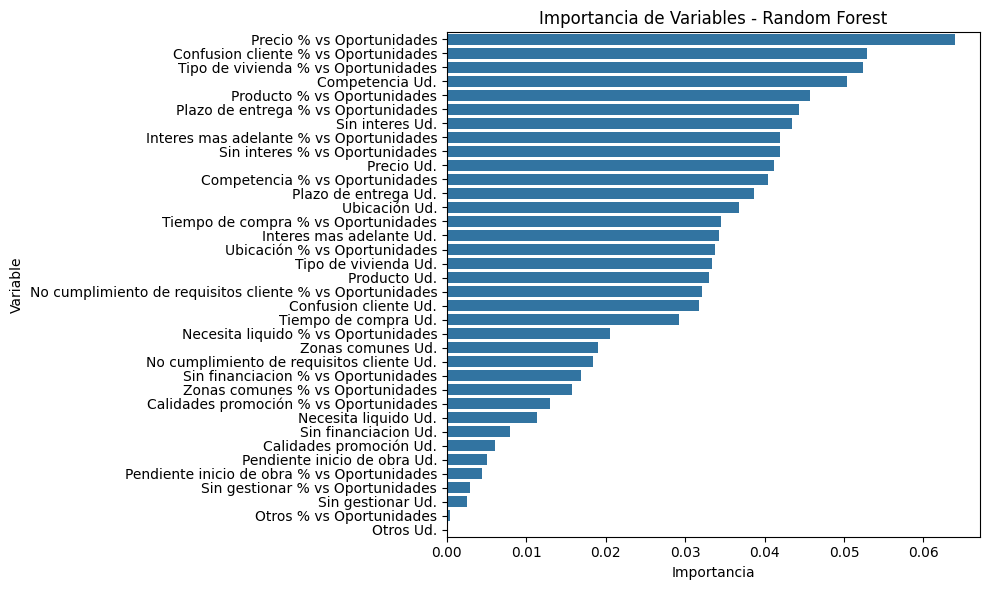


Error: la nueva promoción no tiene el número correcto de características.


In [8]:
# Script para Google Colab - Predicción de Regiones Óptimas para Construcción de Viviendas

# Instalar librerías necesarias (sólo en Colab)
!pip install xgboost openpyxl seaborn --quiet

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Subir archivo
# uploaded = files.upload() #Commented out as it's colab specific
# file_path = list(uploaded.keys())[0] #Commented out as it's colab specific

# Cargar datos
#print("Cargando datos desde:", file_path) #Commented out as it's colab specific
#df = pd.read_excel(file_path) #Commented out as it's colab specific
# Example for local execution
df = pd.read_excel('data_descartes.xlsx') #Replace 'your_file.xlsx' with your file name

# Selección de columnas
target = 'Territorial'
drop_cols = ['Territorial', 'Delegación', 'Promoción']
features = [col for col in df.columns if col not in drop_cols]

# Imputar valores faltantes
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(df[features])
y = df[target]

# Encode the target variable 'y' using LabelEncoder
# This will convert the string labels to numerical representations
encoder = LabelEncoder()
y = encoder.fit_transform(y)


# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos a comparar
modelos = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

resultados = {}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    resultados[nombre] = classification_report(y_test, y_pred, output_dict=True)
    print(f"\nModelo: {nombre}\n")
    print(classification_report(y_test, y_pred))

# Importancia de variables con Random Forest
rf = modelos["Random Forest"]
importancias = rf.feature_importances_
indices = np.argsort(importancias)[::-1]
labels = np.array(features)[indices]

plt.figure(figsize=(10, 6))
sns.barplot(x=importancias[indices], y=labels)
plt.title("Importancia de Variables - Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

# Ejemplo de predicción
nueva_promocion = np.array([[10, 0.02, 5, 0.01, 8, 0.04, 1, 0.001, 5, 0.01, 10, 0.02, 15, 0.03, 1, 0.001]])
# Asegúrate de que tenga el mismo número de columnas que X_train
if nueva_promocion.shape[1] == X_train.shape[1]:
    # Predict using the trained model and then decode the prediction
    # back to the original label using encoder.inverse_transform()
    prediccion = encoder.inverse_transform(rf.predict(nueva_promocion))
    print(f"\nPredicción para nueva promoción: {prediccion[0]}")
else:
    print("\nError: la nueva promoción no tiene el número correcto de características.")

Saving data_descartes.xlsx to data_descartes (1).xlsx

Archivo cargado correctamente:

  Territorial          Delegación          Promoción  Calidades promoción Ud.  \
0   ANDALUCIA  ANDALUCIA ORIENTAL     ADALUS GRANADA                      1.0   
1   ANDALUCIA  ANDALUCIA ORIENTAL      AIREM ALMERÍA                      NaN   
2   ANDALUCIA  ANDALUCIA ORIENTAL      ALBOR GRANADA                      2.0   
3   ANDALUCIA  ANDALUCIA ORIENTAL   ALBORADA ALMERIA                      NaN   
4   ANDALUCIA  ANDALUCIA ORIENTAL  ALCALÁ GRANADA II                      1.0   

   Calidades promoción % vs Oportunidades  Competencia Ud.  \
0                                0.000482             45.0   
1                                     NaN              4.0   
2                                0.001650             52.0   
3                                     NaN             10.0   
4                                0.000705             18.0   

   Competencia % vs Oportunidades  Confusion cliente 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:56:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Modelo: Logistic Regression
Precisión: 0.22
                   precision    recall  f1-score   support

        ANDALUCIA       0.13      0.30      0.18        10
ARCO MEDITERRANEO       0.25      0.13      0.17        15
           CENTRO       0.25      0.27      0.26        11
         NOROESTE       0.67      0.20      0.31        10

         accuracy                           0.22        46
        macro avg       0.32      0.23      0.23        46
     weighted avg       0.31      0.22      0.23        46


Modelo: XGBoost
Precisión: 0.33
                   precision    recall  f1-score   support

        ANDALUCIA       0.26      0.50      0.34        10
ARCO MEDITERRANEO       0.40      0.27      0.32        15
           CENTRO       0.40      0.36      0.38        11
         NOROESTE       0.29      0.20      0.24        10

         accuracy                           0.33        46
        macro avg       0.34      0.33      0.32        46
     weighted avg       0.35    

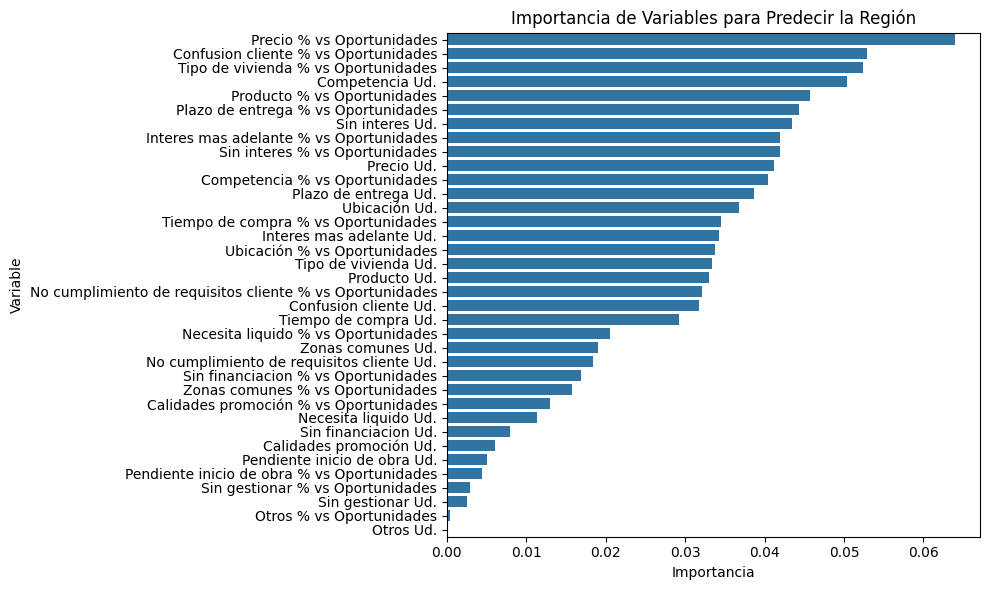


Introduce los valores de una nueva promoción para predecir en qué región construir.
Ejemplo (modificable): [10, 0.02, 5, 0.01, 8, 0.04, 1, 0.001, ...]

❌ Error: la nueva promoción no tiene el número correcto de características.


In [9]:
# Script para Google Colab - Predicción de la Mejor Región para Construir Viviendas

# Instalar librerías necesarias (sólo en Colab)
!pip install xgboost openpyxl seaborn --quiet

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Subir archivo Excel con datos históricos
uploaded = files.upload()
file_path = list(uploaded.keys())[0]
df = pd.read_excel(file_path)
print("\nArchivo cargado correctamente:\n")
print(df.head())

# ---------------------------------------------------------------
# OBJETIVO: Predecir cuál es la mejor región para construir una nueva promoción
# usando patrones de descarte históricos (porcentaje y unidades por motivo).
# ---------------------------------------------------------------

# Limpieza y selección de columnas relevantes
variables_objetivas = 'Territorial'
drop_cols = ['Delegación', 'Promoción']
features = [col for col in df.columns if col not in drop_cols]

# Imputar valores faltantes con la media
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(df[features].drop(columns=[variables_objetivas]))
y_raw = df[variables_objetivas]

# Codificar variable objetivo
encoder = LabelEncoder()
y = encoder.fit_transform(y_raw)

# División de los datos para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Diccionario de modelos
modelos = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Entrenamiento y evaluación
mejor_modelo = None
mejor_score = 0
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    score = modelo.score(X_test, y_test)
    print(f"\nModelo: {nombre}")
    print(f"Precisión: {score:.2f}")
    print(classification_report(y_test, modelo.predict(X_test), target_names=encoder.classes_))
    if score > mejor_score:
        mejor_score = score
        mejor_modelo = modelo

# Visualización de importancia de variables (solo si el modelo tiene atributos de importancia)
if hasattr(mejor_modelo, 'feature_importances_'):
    importancias = mejor_modelo.feature_importances_
    indices = np.argsort(importancias)[::-1]
    labels = np.array(df[features].drop(columns=[variables_objetivas]).columns)[indices]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=importancias[indices], y=labels)
    plt.title("Importancia de Variables para Predecir la Región")
    plt.xlabel("Importancia")
    plt.ylabel("Variable")
    plt.tight_layout()
    plt.show()

# ---------------------------------------------------------------
# PREDICCIÓN SOBRE UNA NUEVA PROMOCIÓN (sin región definida)
# ---------------------------------------------------------------

print("\nIntroduce los valores de una nueva promoción para predecir en qué región construir.")
print("Ejemplo (modificable): [10, 0.02, 5, 0.01, 8, 0.04, 1, 0.001, ...]")

# Crear un array con los valores de entrada (debe tener el mismo número de columnas que X_train)
nueva_promocion = np.array([[10, 0.02, 5, 0.01, 8, 0.04, 1, 0.001, 5, 0.01, 10, 0.02, 15, 0.03, 1, 0.001]])

if nueva_promocion.shape[1] == X_train.shape[1]:
    prediccion = mejor_modelo.predict(nueva_promocion)
    region_recomendada = encoder.inverse_transform(prediccion)
    print(f"\n🏡 Región recomendada para construir la promoción: {region_recomendada[0]}")
else:
    print("\n❌ Error: la nueva promoción no tiene el número correcto de características.")


Saving data_descartes.xlsx to data_descartes (4).xlsx

Archivo cargado correctamente:

  Territorial          Delegación          Promoción  Calidades promoción Ud.  \
0   ANDALUCIA  ANDALUCIA ORIENTAL     ADALUS GRANADA                      1.0   
1   ANDALUCIA  ANDALUCIA ORIENTAL      AIREM ALMERÍA                      NaN   
2   ANDALUCIA  ANDALUCIA ORIENTAL      ALBOR GRANADA                      2.0   
3   ANDALUCIA  ANDALUCIA ORIENTAL   ALBORADA ALMERIA                      NaN   
4   ANDALUCIA  ANDALUCIA ORIENTAL  ALCALÁ GRANADA II                      1.0   

   Calidades promoción % vs Oportunidades  Competencia Ud.  \
0                                0.000482             45.0   
1                                     NaN              4.0   
2                                0.001650             52.0   
3                                     NaN             10.0   
4                                0.000705             18.0   

   Competencia % vs Oportunidades  Confusion cliente 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:10:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


                   precision    recall  f1-score   support

        ANDALUCIA       0.12      0.30      0.18        10
ARCO MEDITERRANEO       0.29      0.13      0.18        15
           CENTRO       0.17      0.18      0.17        11
         NOROESTE       0.67      0.20      0.31        10

         accuracy                           0.20        46
        macro avg       0.31      0.20      0.21        46
     weighted avg       0.31      0.20      0.21        46


Modelo: XGBoost
Precisión: 0.28
                   precision    recall  f1-score   support

        ANDALUCIA       0.25      0.40      0.31        10
ARCO MEDITERRANEO       0.57      0.27      0.36        15
           CENTRO       0.29      0.36      0.32        11
         NOROESTE       0.11      0.10      0.11        10

         accuracy                           0.28        46
        macro avg       0.30      0.28      0.27        46
     weighted avg       0.33      0.28      0.28        46



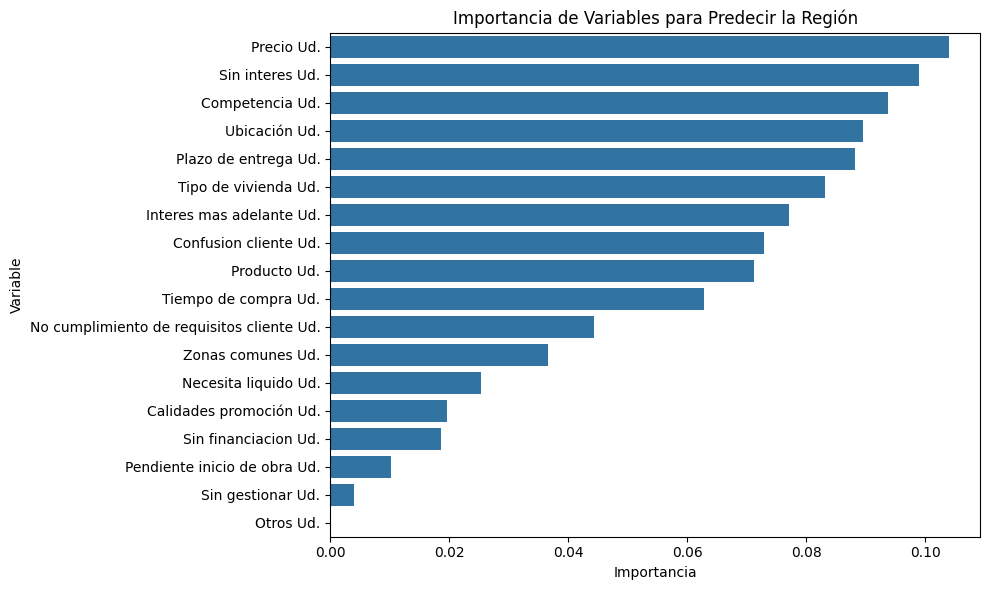


Introduce los valores de una nueva promoción para predecir en qué región construir.
Ejemplo (modificable): [10, 5, 8, 1, 5, 10, 15, 1, 3,6,1,5,7,8,5,8,3,9]

🏡 Región recomendada para construir la promoción: ARCO MEDITERRANEO


In [5]:
# Script para Google Colab - Predicción de la Mejor Región para Construir Viviendas

# Instalar librerías necesarias (sólo en Colab)
!pip install xgboost openpyxl seaborn --quiet

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Subir archivo Excel con datos históricos
uploaded = files.upload()
file_path = list(uploaded.keys())[0]
df = pd.read_excel(file_path)
print("\nArchivo cargado correctamente:\n")
print(df.head())

# ---------------------------------------------------------------
# OBJETIVO: Predecir cuál es la mejor región para construir una nueva promoción
# usando patrones de descarte históricos (por unidades por motivo).
# ---------------------------------------------------------------

# Eliminar columnas de porcentaje
cols_pct = [col for col in df.columns if '% vs' in col or '% vs Oportunidades' in col or '%' in col]
df = df.drop(columns=cols_pct)

# Limpieza y selección de columnas relevantes
variables_objetivas = 'Territorial'
drop_cols = ['Delegación', 'Promoción']
features = [col for col in df.columns if col not in drop_cols]

# Imputar valores faltantes con la media
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(df[features].drop(columns=[variables_objetivas]))
y_raw = df[variables_objetivas]

# Codificar variable objetivo
encoder = LabelEncoder()
y = encoder.fit_transform(y_raw)

# División de los datos para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Diccionario de modelos
modelos = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Entrenamiento y evaluación
mejor_modelo = None
mejor_score = 0
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    score = modelo.score(X_test, y_test)
    print(f"\nModelo: {nombre}")
    print(f"Precisión: {score:.2f}")
    print(classification_report(y_test, modelo.predict(X_test), target_names=encoder.classes_))
    if score > mejor_score:
        mejor_score = score
        mejor_modelo = modelo

# Visualización de importancia de variables (solo si el modelo tiene atributos de importancia)
if hasattr(mejor_modelo, 'feature_importances_'):
    importancias = mejor_modelo.feature_importances_
    indices = np.argsort(importancias)[::-1]
    labels = np.array(df[features].drop(columns=[variables_objetivas]).columns)[indices]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=importancias[indices], y=labels)
    plt.title("Importancia de Variables para Predecir la Región")
    plt.xlabel("Importancia")
    plt.ylabel("Variable")
    plt.tight_layout()
    plt.show()

# ---------------------------------------------------------------
# PREDICCIÓN SOBRE UNA NUEVA PROMOCIÓN (sin región definida)
# ---------------------------------------------------------------

print("\nIntroduce los valores de una nueva promoción para predecir en qué región construir.")
print("Ejemplo (modificable): [10, 5, 8, 1, 5, 10, 15, 1, 3,6,1,5,7,8,5,8,3,9]")

# Crear un array con los valores de entrada (debe tener el mismo número de columnas que X_train)
nueva_promocion = np.array([[0, 0, 0,0, 0, 0, 1, 0, 0,0,0,0,0,0,0,0,0,0]])  # Ejemplo ajustado

if nueva_promocion.shape[1] == X_train.shape[1]:
    prediccion = mejor_modelo.predict(nueva_promocion)
    region_recomendada = encoder.inverse_transform(prediccion)
    print(f"\n🏡 Región recomendada para construir la promoción: {region_recomendada[0]}")
else:
    print("\n❌ Error: la nueva promoción no tiene el número correcto de características.")
